In [17]:
import pandas as pd
import ta
from pandas_datareader import data as web
import datetime
import numpy as np
from ta.utils import dropna
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Microsoft Options - MSFT
stock = 'MSFT'
start_date = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source='yahoo', start=start_date)
df = dropna(df)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,127.589996,125.760002,126.519997,126.220001,23706900.0,125.032967
2019-05-21,127.529999,126.580002,127.430000,126.900002,15293300.0,125.706573
2019-05-22,128.240005,126.519997,126.620003,127.669998,15396500.0,126.469322
2019-05-23,126.290001,124.739998,126.199997,126.180000,23603800.0,124.993340
2019-05-24,127.419998,125.970001,126.910004,126.239998,14123400.0,125.052765


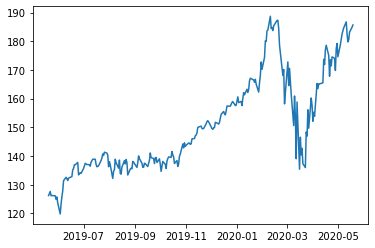

In [18]:
plt.plot(df['Close'])

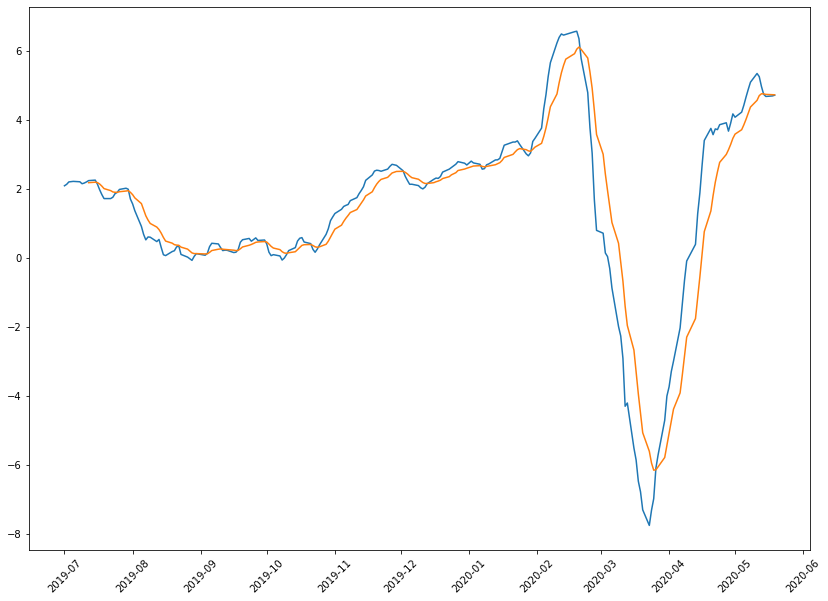

In [19]:
#MACD- Moving Average Convergence/Divergence

macd = ta.trend.MACD(close=df['Close'], n_slow=30, n_fast= 15,n_sign=9)
df['MACD'] = macd.macd_diff()
#Orange Line
plt.figure(figsize=(14,10))
plt.xticks(rotation='45')

plt.plot(macd.macd()) 
#Blue Line
plt.plot(macd.macd_signal())

In [20]:
#CCI- Commodity Channel Index
#Here we focus on where the graph hits the zero line. If it is positive and it hits zero we want to sell and if it is negative and hits zero we want to buy.
#A zero line has also been added to visualise better
df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'], n=31, c=0.015)

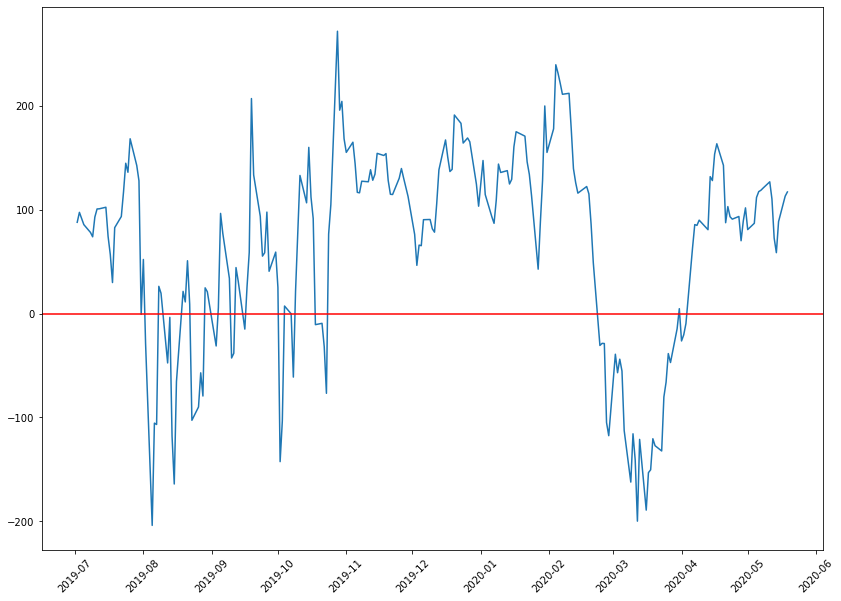

In [22]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='45')
plt.plot(df['CCI'])
plt.axhline(y=0, color='r', linestyle='-')

In [23]:
#RSI - Relative Strength Index
#This is not a strength indicator rather a momentum indicator meaning that it measures the rise and fall of the stock price.
#The standard for these is to look if it goes above 70 or below 30. Meaning to sell when it goes over and sell if it falls under is a good indicator to buy.
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], n = 14).rsi()

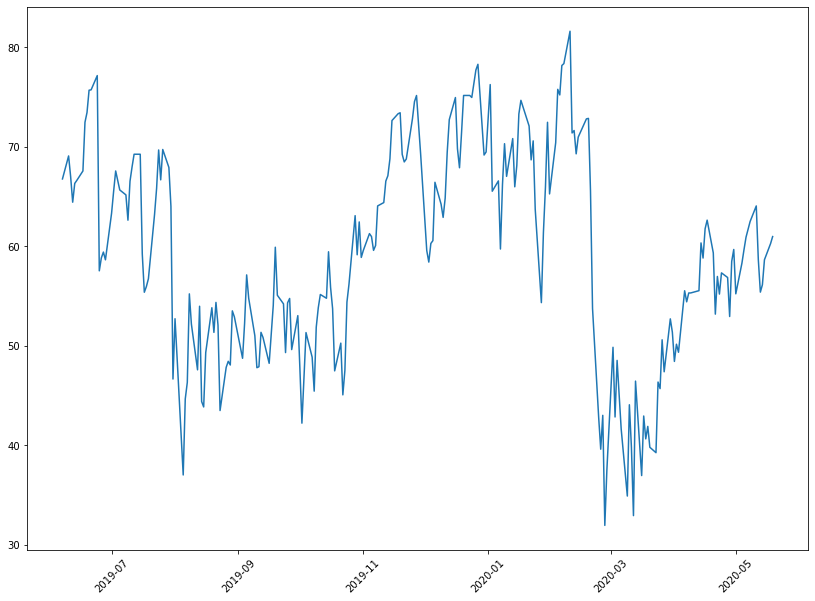

In [29]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='45')
plt.plot(df['RSI'])
#plt.axhline(y=70, color='r', linestyle='-')
#plt.axhline(y=30, color='y', linestyle='-')